In [2]:
import pandas as pd
import os
os.chdir("C:\\Users\\nithy\\Downloads\\scripts\\final_dataset_2")
final=pd.read_csv("pythio_final_2.csv")

In [3]:
X=final[['AvailableCapacity_/home/cc/pythio_pythio-1','AvailableCapacity_/dev/shm_pythio-1','AvailableCapacity_/_pythio-2','AvailableCapacity_/home/cc/pythio_pythio-2','AvailableCapacity_/dev/shm_pythio-2','AvailableCapacity_/_pythio-3','AvailableCapacity_/home/cc/pythio_pythio-3','AvailableCapacity_/dev/shm_pythio-3','AvailableCapacity_/_pythio-4','AvailableCapacity_/home/cc/pythio_pythio-4','AvailableCapacity_/dev/shm_pythio-4','AvailableCapacity_/_pythio-6','AvailableCapacity_/home/cc/pythio_pythio-6','AvailableCapacity_/dev/shm_pythio-6','AvailableCapacity_/_pythio-7','AvailableCapacity_/home/cc/pythio_pythio-7','AvailableCapacity_/dev/shm_pythio-7','AvailableCapacity_/_pythio-8','AvailableCapacity_/home/cc/pythio_pythio-8','AvailableCapacity_/dev/shm_pythio-8','AvailableCapacity_/_pythio-vm','AvailableCapacity_/home/cc/pythio_pythio-vm','AvailableCapacity_/dev/shm_pythio-vm','AvailableCapacity_/_pythios-vm','AvailableCapacity_/home/cc/pythio_pythios-vm','AvailableCapacity_/dev/shm_pythios-vm']].div(1000*1000*1000)
X=X.join(final['avg_qu_io_pythio-1'])
Y=final['AvailableCapacity_/_pythio-1'].div(1000*1000*1000)
X_train=X[:38672]
Y_train=Y[:38672]
X_test=X[38673:]
Y_test=Y[38673:]
multi_data=X.values
X.corr()


,AvailableCapacity_/home/cc/pythio_pythio-1,AvailableCapacity_/dev/shm_pythio-1,AvailableCapacity_/_pythio-2,AvailableCapacity_/home/cc/pythio_pythio-2,AvailableCapacity_/dev/shm_pythio-2,AvailableCapacity_/_pythio-3,AvailableCapacity_/home/cc/pythio_pythio-3,AvailableCapacity_/dev/shm_pythio-3,AvailableCapacity_/_pythio-4,AvailableCapacity_/home/cc/pythio_pythio-4,...,AvailableCapacity_/_pythio-8,AvailableCapacity_/home/cc/pythio_pythio-8,AvailableCapacity_/dev/shm_pythio-8,AvailableCapacity_/_pythio-vm,AvailableCapacity_/home/cc/pythio_pythio-vm,AvailableCapacity_/dev/shm_pythio-vm,AvailableCapacity_/_pythios-vm,AvailableCapacity_/home/cc/pythio_pythios-vm,AvailableCapacity_/dev/shm_pythios-vm,avg_qu_io_pythio-1
AvailableCapacity_/home/cc/pythio_pythio-1,1.000000,0.225760,0.997245,0.998624,0.230176,0.997674,0.999598,0.400492,0.996970,0.998417,...,0.998182,0.999923,0.134372,0.997778,0.999396,0.239669,0.999537,0.998183,-0.129870,-0.031449
AvailableCapacity_/dev/shm_pythio-1,0.225760,1.000000,0.194364,0.237557,0.987803,0.190291,0.230758,0.959647,0.196753,0.247638,...,0.196970,0.222447,0.866914,0.195302,0.210946,0.870722,0.214975,0.193279,0.801426,-0.012205
AvailableCapacity_/_pythio-2,0.997245,0.194364,1.000000,0.992356,0.201300,0.999739,0.995415,0.375731,0.999688,0.992399,...,0.999672,0.997537,0.124424,0.999856,0.999108,0.231830,0.997640,0.999677,-0.171262,-0.030581
AvailableCapacity_/home/cc/pythio_pythio-2,0.998624,0.237557,0.992356,1.000000,0.240048,0.993158,0.999500,0.406354,0.992036,0.999582,...,0.993931,0.998391,0.131970,0.993229,0.996412,0.235316,0.997434,0.993958,-0.109242,-0.031511
AvailableCapacity_/dev/shm_pythio-2,0.230176,0.987803,0.201300,0.240048,1.000000,0.197839,0.234513,0.960682,0.205143,0.250449,...,0.204275,0.227157,0.895340,0.202683,0.216560,0.886807,0.219282,0.199837,0.788958,-0.010554
AvailableCapacity_/_pythio-3,0.997674,0.190291,0.999739,0.993158,0.197839,1.000000,0.995994,0.371166,0.999689,0.992963,...,0.999882,0.997948,0.122547,0.999918,0.999319,0.228110,0.998063,0.999857,-0.171097,-0.030635
AvailableCapacity_/home/cc/pythio_pythio-3,0.999598,0.230758,0.995415,0.999500,0.234513,0.995994,1.000000,0.401888,0.995254,0.999443,...,0.996495,0.999532,0.133476,0.996105,0.998371,0.237177,0.998602,0.996515,-0.123447,-0.031295
AvailableCapacity_/dev/shm_pythio-3,0.400492,0.959647,0.375731,0.406354,0.960682,0.371166,0.401888,1.000000,0.377133,0.415850,...,0.378029,0.397601,0.836036,0.375851,0.388591,0.867996,0.392591,0.374008,0.719865,-0.014703
AvailableCapacity_/_pythio-4,0.996970,0.196753,0.999688,0.992036,0.205143,0.999689,0.995254,0.377133,1.000000,0.992311,...,0.999512,0.997282,0.131702,0.999789,0.998880,0.237099,0.997047,0.999397,-0.169262,-0.030493
AvailableCapacity_/home/cc/pythio_pythio-4,0.998417,0.247638,0.992399,0.999582,0.250449,0.992963,0.999443,0.415850,0.992311,1.000000,...,0.993664,0.998326,0.141075,0.993196,0.996366,0.244140,0.996929,0.993651,-0.105198,-0.031278


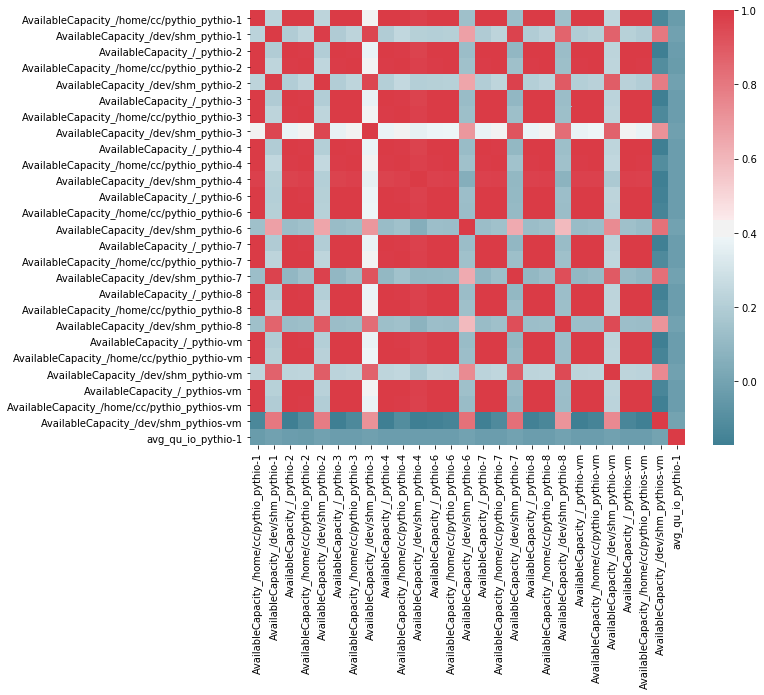

In [21]:
import seaborn as sns
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

NN_model = Sequential()

    # The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

    # The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))


    # The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
opt = Adam(lr=0.001)

    # Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae','mse'])

In [19]:
history=NN_model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split = 0.1)

Train on 34804 samples, validate on 3868 samples
Epoch 1/20
34804/34804 [==============================] - 4s 110us/step - loss: 0.3171 - mean_absolute_error: 0.4496 - mean_squared_error: 0.3171 - val_loss: 1.8543 - val_mean_absolute_error: 1.1709 - val_mean_squared_error: 1.8543
Epoch 2/20
34804/34804 [==============================] - 4s 109us/step - loss: 0.3477 - mean_absolute_error: 0.4756 - mean_squared_error: 0.3477 - val_loss: 3.5840 - val_mean_absolute_error: 1.7213 - val_mean_squared_error: 3.5840
Epoch 3/20
34804/34804 [==============================] - 4s 109us/step - loss: 0.3893 - mean_absolute_error: 0.4975 - mean_squared_error: 0.3893 - val_loss: 2.4973 - val_mean_absolute_error: 1.3833 - val_mean_squared_error: 2.4973
Epoch 4/20
34804/34804 [==============================] - 4s 114us/step - loss: 0.3566 - mean_absolute_error: 0.4751 - mean_squared_error: 0.3566 - val_loss: 1.6476 - val_mean_absolute_error: 1.1007 - val_mean_squared_error: 1.6476
Epoch 5/20
34804/34804 

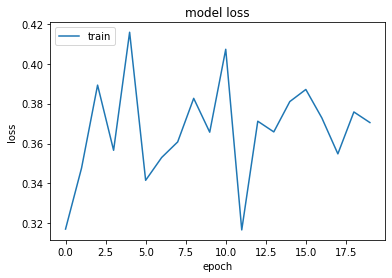

In [20]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
from sklearn import metrics
predict=NN_model.predict(X_test)
score=metrics.mean_absolute_error(Y_test,predict )
score

0.8937400642569434

In [14]:
print(NN_model.predict(X_test[0:10]))
print(Y_test[0:10])

[[235.40393]
 [235.39052]
 [235.39052]
 [235.39052]
 [235.39052]
 [235.38551]
 [235.37813]
 [235.37027]
 [235.3676 ]
 [235.30667]]
38673    236.262
38674    236.248
38675    236.248
38676    236.248
38677    236.248
38678    236.244
38679    236.237
38680    236.235
38681    236.228
38682    236.218
Name: AvailableCapacity_/_pythio-1, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)
#regressor=RandomForestRegressor(n_estimators=500, max_samples=0.1,random_state=0)
#regressor.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 83.9min


In [7]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=1000, max_samples=0.1,random_state=0)
regressor.fit(X_train, Y_train)




RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=0.1, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [8]:
from sklearn import metrics
predict=regressor.predict(X_test)
score=metrics.mean_absolute_error(Y_test,predict )
print(score)

15.827069127650491


In [15]:
print("predicted values\n",regressor.predict(X_test[100:110]))


predicted values
 [236.285239 236.285239 236.285239 236.285434 236.285434 236.285434
 236.285434 236.287199 236.287199 236.287553]


In [16]:
print("Actual values",Y_test[100:110])

Actual values 38773    235.712
38774    235.708
38775    235.703
38776    235.700
38777    235.692
38778    235.689
38779    235.684
38780    235.681
38781    235.674
38782    235.669
Name: AvailableCapacity_/_pythio-1, dtype: float64
